# Diabetes Risk: The Prediction of Diabetes Risk Through Supervised Learning
---

### 1 Introduction

---
#### 1.1 Overview

Diabetes is a metabolical disorder that impacts individual's blood sugar levels. This is often due to the inability to produce or utilize insulin. Dibetes has become quite prevalent in the modern world, given the changes in diets, the prevelance of other diseases, and and many other possible external factors. However, given that diabetes, especially type 2, can appear later on in an individual's life. Given that that change can occur without one knowing, it would be interesting to understand whether certain known risks of diabetes can potential predict an individual's ability to detect diabetes with these risks, as well as determine what groups of individuals are proned to acquiring diabetes. To understand this topic further, it is essential to apply supervised learning, via predictive models, such as Logistic Regression and Decision Tree Classifier.

#### 1.2 Goal

As an individual who has predisposition to diabetes via genetics, it is essential to understand the potential risk that may predict diabetes, as well as understand the risks that come from having diabetes. To approach this problem, it is essential to build a decision classifier for the data, based on the risk's relevance to diabetes, as well as a logistc regression to predict whether one can get diabetes based on symptoms of the risk. As a result, the purpose  conducting this investigation is to determine whether or not diabetes can be predicted based on certain risk factors, as well classifying the risks necessary to predict diabetes. By doing so, it will allow for potential awareness of symptoms that may prevent the increase risk of getting diabetes, as well means to explore preventative care based on these findngs for diabetes.

#### 1.3 About the Data

**1.3.1 Load The Data**

In [1]:
import numpy as np # for statistical analysis
import pandas as pd # to data process and load csv.
from sklearn.model_selection import train_test_split, learning_curve
import copy # to copy data as needed
import matplotlib.pyplot as plt # to create plots
import seaborn as sns # to visualize pairplots and correalation matrices
from sklearn.linear_model import LogisticRegression # to create logistic regressions
from sklearn.tree import DecisionTreeClassifier # to create a decision tree
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix # to calculate for a confusion matrix
from sklearn.tree import plot_tree # to plot decision tree

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/casestudy-diabetespredic/diabetes_data_upload.csv
/kaggle/input/diabetes-risk-prediction/diabetes_risk_prediction_dataset.csv


In [2]:
# acquire the diabetes data
diabetes = pd.read_csv("/kaggle/input/diabetes-risk-prediction/diabetes_risk_prediction_dataset.csv")

# print out top 5 data sets from diabetes
diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
# print number of columns
print("Number of Columns:", 
      len(diabetes.columns))

#print number of rows
print("Number of Rows:", 
      len(diabetes))

Number of Columns: 17
Number of Rows: 520


**Observations:** Just from a glance, this data evidently showcases that every variable is a binary classification, except for `Age`. Given that the main focus is determining how risk factors can predict diabetes, it is essential to allocate `class` as the response variable. This is because `class` is classifies of whether an individual has diabetes or not, will be the response factor for the multi-linear regression. Another thing to take note of is that every variable is non-numeric, meaning all the binary classification columns will need to be converted to binary values. There is also evidently 17 features and 520 observations.

**1.3.2 Data Source and Citation**

**_Citation:_**
Himanshu (rcratos).(n.d.). Diabetes Risk Prediction [Data set]. Kaggle. Retrieved from https://www.kaggle.com/datasets/rcratos/diabetes-risk-prediction

The dataset that was used is called the Diabetes Risk Prediction from Kaggle. It can be found from the [Data Risk Prediction](https://www.kaggle.com/datasets/rcratos/diabetes-risk-prediction/data) page, which is cited in the link above. In this data, it provides information on individuals with different potential risk factors for diabetes, which could be used to decide risk predictions. 

**1.3.3 Data Description**

This data overall provides information on individuals and whether they have acquired the potential risk factors of diabetes, as well as whether they have diabetes themselves.

This data consists of is 520 rows and 7 columns. Here are all the features of this data and what they are:

- **Age**: The age of the individual. (Numeric)
- **Gender**: The gender of the individual. (Categorical: Male or Female)
- **Polyuria**: A common diabetes symptom in which an individual urinates excessively. (Binary Classification: Yes or No)
- **Polydipsia**: A common diabetes symptom in which an individual is excessively thirsty. (Binary Classification: Yes or No)
- **Sudden weight loss**: A diabetes symptom when an individuals experiences severe unexplained weight loss, which can be a sign of diabetes. (Binary Classification: Yes or No)
- **Weakness**: A sign of the individual experiences physical weakness 
- **Polyphagia**: A common diabetes symptom in which an individual is excessively hungry. (Binary Classification: Yes or No)
- **Genital thrush**: A yeast infection that causes irritation in the genital area. (Binary Classification: Yes or No)
- **Visual blurring**: A loss or blur in vision (Binary Classification: Yes or No)
- **Itching**: Whether an individual experiences itching or irritation. (Binary Classification: Yes or No)
- **Irritability**: Whether the individual experiences irritability or not. (Binary Classification: Yes or No)
- **Delayed healing**: Whether the individual experiences slow healing of wounds.(Binary Classification: Yes or No)
- **Partial paresis**: A symptom of diabetes in which there is partial loss of voluntary movement. (Binary Classification: Yes or No)
- **Muscle stiffness**: Whether the individual experiences muscle stiffness. (Binary Classification: Yes or No)
- **Alopecia**: Whether the individual suffers from hair loss. (Binary Classification: Yes or No)
- **Obesity**: Whether the individual is obese or not (Binary Classification: Yes or No)
- **Class**: Whether the individual has diabetes or not (Binary Classification: Yes or No)

This data will be used to evaluate vital symptoms/risks that contribute to diabetes, as well as predict causes of diabetes risk/risk factors that come from diabetes.


### 2 Data Cleaning

--- 
#### 2.1 Data Exploration

The first part of the exploratory data analysis, is to determine what kind of data is being used in this investigation. It is also important to evaluate any important parts of the data that may need to be processed. For this first part, it would be good to make sure the data reflects the data type they are described to be. Then it will be useful to know whether there are null values that may need to be preprocessed before analysis. 

**2.1.1: Types of Usable Data**

In [4]:
# print out top 5 data sets from diabetes
diabetes.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


**Observations:** Based on this table, there is evidently categorical data that need to be converted to binary values, especially when it comes to any feature aside from "Age".

In [5]:
# print information on the datasets
# check for null values
print("Diabetes Information")
print(diabetes.info(), "\n")

Diabetes Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class

**Observations:** Based on the `Diabetes Information` above, it is evident that age is the only numeric variable present in the data, which means every other column needs to be converted into binary values.

**2.1.2: Evaluate Potential Need To Remove Null Values**

In [6]:
# print number sum of null values present in each column
print("Diabetes Information: Null Values")
print(diabetes.isnull().sum(), "\n")

Diabetes Information: Null Values
Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64 



**Observations:** For the `Diabetes Information: Null Values` table, there are no null variables to extract, which means this data has been processed to not include null values.

**Suggestions for Pre-Processing:** The data evalution suggests there are no null values to remove from the data for any features. However, the data itself suggests that data need to be converted to binary values before conducting exploratory data analysis. The boxplot for `Age` suggest there may not be a need to standardize the `Age` feature, but  for safe measures, it will still be best to normalize the data.

#### 2.2 Pre-Process Data for Exploratory Analysis

**2.2.1 Approach** 

To get started in further understanding that data at hand, it is vital to ensure the data is useable for the process. The first step is to convert all binary categorical labels into values. The following will be done to the labels: {`Yes = 1`, `No = 0`}, {`Male = 1; Female = 0`}, and {`Positive = 1; Negative = 0`}/ 

**2.2.2 Reassigning Categorical Data to Binary Values** 

In [7]:
# acquire the binary categorical variables and convert to numeric
# select all yes or no binary classifications; not age, gender, and class
bi_col = diabetes.columns.drop(["Age", "Gender", "class"])
# create new diabetes dataframe with new values
db = diabetes.copy()
# ensure yes = 1; no = 0
db[bi_col] = db[bi_col].apply(lambda x: x.map({"Yes": 1,
                                               "No": 0}))
# ensure male = 1; female = 0
db["Gender"] = db["Gender"].map({"Male": 1,
                                 "Female": 0})
# ensure positive = 1; negative = 0
db["class"] = db["class"].map({"Positive": 1,
                               "Negative": 0})
# make sure the new data no longer has the labels
db

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


#### 2.3 Data Cleaning Overview

**Summary:** Overall, there was no null data points and the data was cleaned beforehand in that aspect. However, the data values were in strings fo classification labels, so before proceeding to Exploratory Data Analysis, it was necessary to convert all the Yes or No; Male or Female, and Postive or Negative binary classifications into binary values. This will help allow for correlation matrices and any other exploratory analysis to occur.

The next part is making sure that the columns being kept are useful for analysis. Given that there are 17 variables in total, it might be wise to drop a couple variables.

### 3 Exploratory Data Analysis (EDA)
In this portion, visualizations and analysis will be conducted in order to understand the data more and simplify the data further before modeling. The first part is to find correlations between the features, as well as have and idea of what kind of relationship each chosen feature has in relation to the diabetes classification.

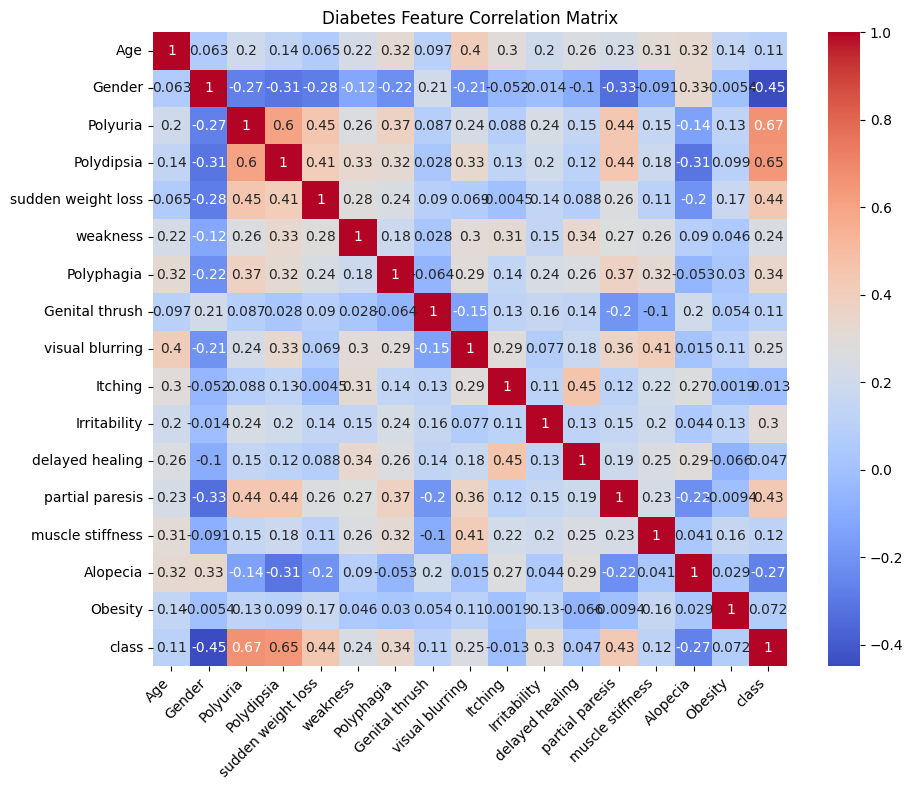

In [8]:
# compute
corr = db.corr()

# create a heatmap on what variables are correlated to diabetes based on gender/age
plt.figure(figsize=(10, 8))
# create heatmap from sns library
sns.heatmap(corr, annot = True, # include correlation values
            cmap = "coolwarm", 
            square = True)
plt.title('Diabetes Feature Correlation Matrix')
plt.xticks(rotation = 45, 
           ha='right')
plt.tight_layout()  # ensure the data is not too big
plt.show()

Based on the evaluation of this data, it seems the variables that have the highest correlation, relative to `class`, would be primarily `Polyuria`, `Polydipisia` and `partial paresis`. However, the lowest risks variables for having diabetes would be, `Genital thrush`, `visual blurring`, `itching`, `weakness`, `delayed healing`, `muscle stiffness`, `Alopecia`, and `Obesity`. However just this alone would not certify that these variables are not essential to identify the risks that are involved in detecting diabetes. 

To simplify this data, it would useful to, mainly model based on more chronic risks, rather than then simple symptoms like itching. In result for the processing, it would be essential to consider removing all variables, except for `Age`, `class`, `Gender`, `Polyuria`, `Polydipsia`, `sudden weight loss`, and `partial paresis`.

#### 3.1 Removing Excess Data
The next thing to evaluate is whether there is useful information that can be determined from the selected variables: `Age`, `class`, `gender`, `Polyuria`, `Polydipsia`, `sudden weight loss`, and `partial paresis`. To do so, the other variables must be excluded, then placed in a new dataframe.

In [9]:
# drop unnecessary features, replace db
db = db[["Age", "Gender", "Polyuria", 
         "Polydipsia", "sudden weight loss", 
         "partial paresis", "class"]]

# display the updated DataFrame
db.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,partial paresis,class
0,40,1,0,1,0,0,1
1,58,1,0,0,0,1,1
2,41,1,1,0,0,0,1
3,45,1,0,0,1,0,1
4,60,1,1,1,1,1,1


#### 3.2 Visualizations
Now it is time to visualize the data relative to theresponse variable. This is to see more of what kind of relationships class has to thes variables.

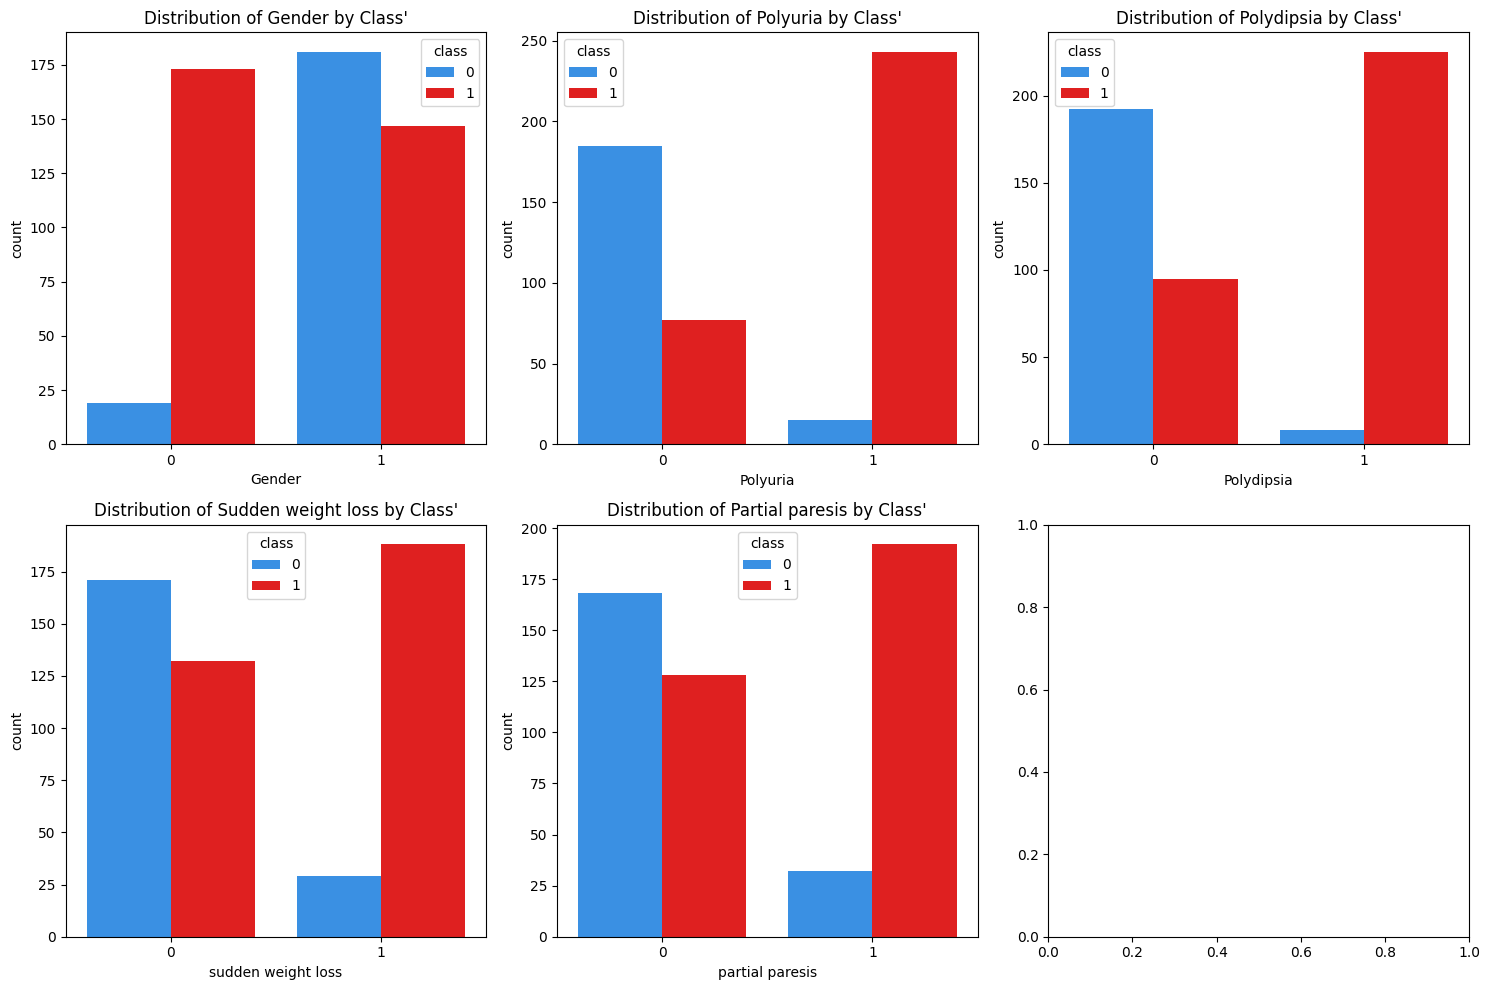

In [10]:
# visualize bar plots for binary variables, relative to class
fig, axes = plt.subplots(2, 3, 
                         figsize=(15, 10))

# iterate through each column feature to creat bar plot
for i, col in enumerate(["Gender", "Polyuria", "Polydipsia", 
                         "sudden weight loss", "partial paresis"]): # exclude age
    sns.countplot(x = col, hue = "class", 
                  data = db, ax = axes[i//3, i%3], 
                  palette = ["dodgerblue", "r"])
    axes[i//3, i%3].set_title(f"Distribution of {col.capitalize()} by Class'")

plt.tight_layout()
plt.show()

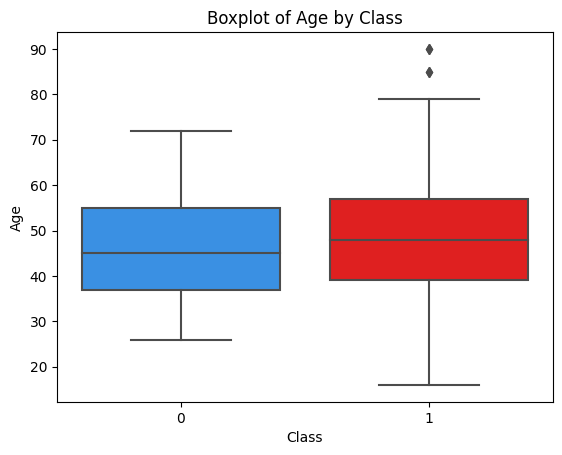

In [11]:
# visualize box plots for "age" relative to class
sns.boxplot(x = "class", y = "Age", 
            data = db, palette = ["dodgerblue", "r"])
plt.xlabel("Class")
plt.ylabel("Age")
plt.title("Boxplot of Age by Class")
plt.show()

**Observations**: It is evident from the bar plots above, those with diabetes in this dataset were most likely to be female, have Polyuria, have Polydipsia, have sudden weight loss and have partial paresis. It is also evident in the boxplot for age that both classes were relatively close, meaning the data most likely evaluated those between 35 to 55, who are at high risk. 



#### 3.3 Pre-Processing Test and Train Data for Models
Now that the target and predictor variables are understood, it is time to create prediction models based on them. However, it must first be pre-processed

In [12]:
# assign class as response variable, and the rest into X
X = db.drop(columns = ["class"])  # Features
y = db['class']  # Target variable

# display X variable
X

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,partial paresis
0,40,1,0,1,0,0
1,58,1,0,0,0,1
2,41,1,1,0,0,0
3,45,1,0,0,1,0
4,60,1,1,1,1,1
...,...,...,...,...,...,...
515,39,0,1,1,1,1
516,48,0,1,1,1,1
517,58,0,1,1,1,1
518,32,0,0,0,0,0


In [13]:
# display the y variable
y 

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64

In [14]:
# now split data using train_test_split; make sure 20% goes to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    shuffle = True,
                                                    random_state = 42)

#### 3.3 EDA Overview

**Summary:** Overall, the corelation matrices determined that `Age`, `class`, `gender`, `Polyuria`, `Polydipsia`, `sudden weight loss`, and `partial paresis` would be the ideal data features to analyze for modeling, and the predicted classifications of individuals to have diabetes are more likely those who are: older than 35, are female, have Polyuria, have Pollydipsia, have sudden weight loss, and have partial paresis. After simplifying the data set to a useable dataframe, the data was split into train and test data set for X and y; respectively.

### 4 Modeling Analysis

---

#### 4.1 Creating Logistic Model
Now that there is test and training data, the training data will be inserted into a logistic model to determine a predictive model for this data set. Once it is done, it can predict potential y predicted values, which can be checked for efficiency later on.

In [15]:
# create a logistic regression model, assign to a shorter name
log_reg = LogisticRegression()

# train the model with X_train and y_train
log_reg.fit(X_train, y_train)

# predict y on using  x_test set
y_pred_lr = log_reg.predict(X_test)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


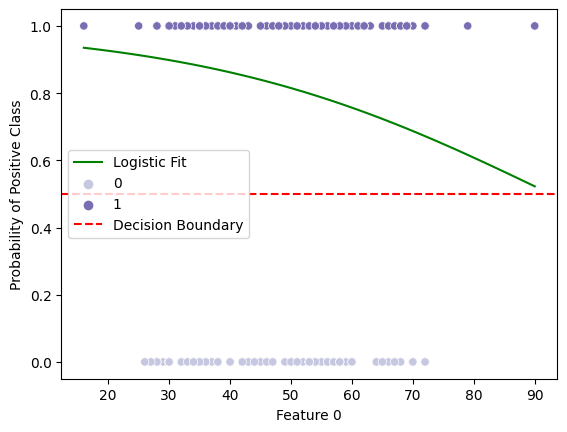

In [19]:
feature_index = 0

# create a matrix with the mean of X_train
x_test_matrix = np.full((100, 
                         X_train.shape[1]), 
                        X_train.mean(axis=0))

# change of the feature over the range
x_test_matrix[:, feature_index] = np.linspace(X_train.iloc[:, feature_index].min(), 
                                              X_train.iloc[:, feature_index].max(), 
                                              100)

# make dataframe for feature change for each feature
x_test_df = pd.DataFrame(x_test_matrix, 
                         columns = X_train.columns)

# pring predicted probability for detecting diabetes
y_test_prob = log_reg.predict_proba(x_test_df)[:, 1] 

# plot logistic regression probabilty for diabetes using sns
sns.lineplot(x = x_test_df.iloc[:, feature_index], 
             y = y_test_prob, 
             label = "Logistic Fit", 
             color ="green")
sns.scatterplot(x = X_train.iloc[:, feature_index], 
                y = y_train, hue = y_train, 
                palette = "Purples")  # hue adds color based on 'y_train'

plt.xlabel(f"Feature {feature_index}")
plt.ylabel("Probability of Positive Class")
plt.axhline(0.5, color="red", 
            linestyle="--", 
            label="Decision Boundary")
plt.legend()
plt.show()


**Observations:** According to the plot, the probabilty of the individual being diabetic decreases as features increase. This indicates  that too many risk features could make it harder to predict if one has diabetes.

#### 4.2 Evaluate Efficiency of the Logistic Regression Efficiency
Now that the target and predictor variables are understood, it is time to create prediction models based on them. However, it must first be pre-processed



In [20]:
# evaluate the model's accuracy and precision
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)

# print the results
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)

Accuracy: 0.9134615384615384
Precision: 0.918918918918919


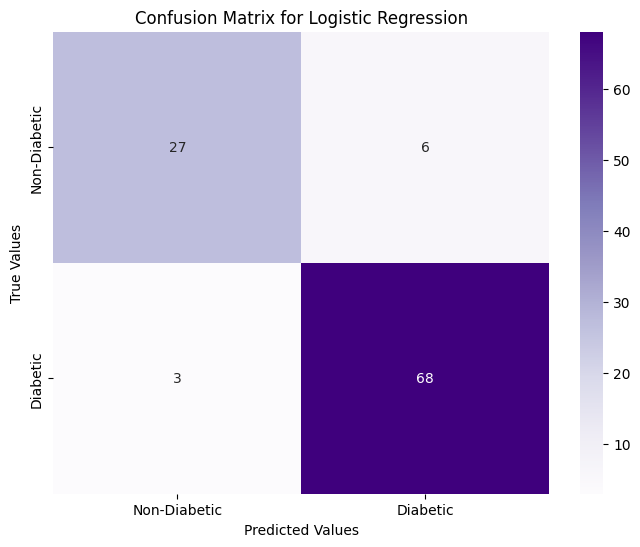

In [21]:
# create a confusion matrix using the y_test and y_pred variables
conf_matrix_lr = confusion_matrix(y_test, 
                               y_pred_lr)

# plot confusion matrix using sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, cmap = "Purples", 
            xticklabels=["Non-Diabetic", "Diabetic"], 
            yticklabels=["Non-Diabetic", "Diabetic"])
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

**Observations:** Based on the accuracy and the precision, it is evident that the logistic regression is an ideal model for evaluating this data set. This is because accuracy was found to be **0.913** and precision was found to be **0.919**. In result, logistic regression with all these risk variables are able to predict whether one is diabetic or not. As for the confusion matrix, it is clear that the model succeeds because there are more values present in the True Positive and True Negative slots, meaning the model can predict somewhat accurately.

#### 4.3 Create a Decision Classifier

A Decision Classifer is ideal for binary classifications because they evaluate by what circumstances determine whether someone is prone to having diabetes and whether they predict one's diabetic chances frome these risks. So, this is the next part of this analysis.



In [22]:
# start a the decision tree classifier
decision_tree = DecisionTreeClassifier(max_depth = 6)

# fit the decision tree classifier model on the training data
decision_tree.fit(X_train, y_train)

# predict y on using  x_test set
y_pred_dt = decision_tree.predict(X_test)

#### 4.4 Evaluate Efficiency of the Decision Tree Classifier
As conducted on the logistic regression, it is essential to evaluate whether the Decision Tree Classifier is a good model to predict diabetes based on the selected risk factors.

In [23]:
# evaluate the model's accuracy and precision
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)

# print the results
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)

Accuracy: 0.9423076923076923
Precision: 1.0


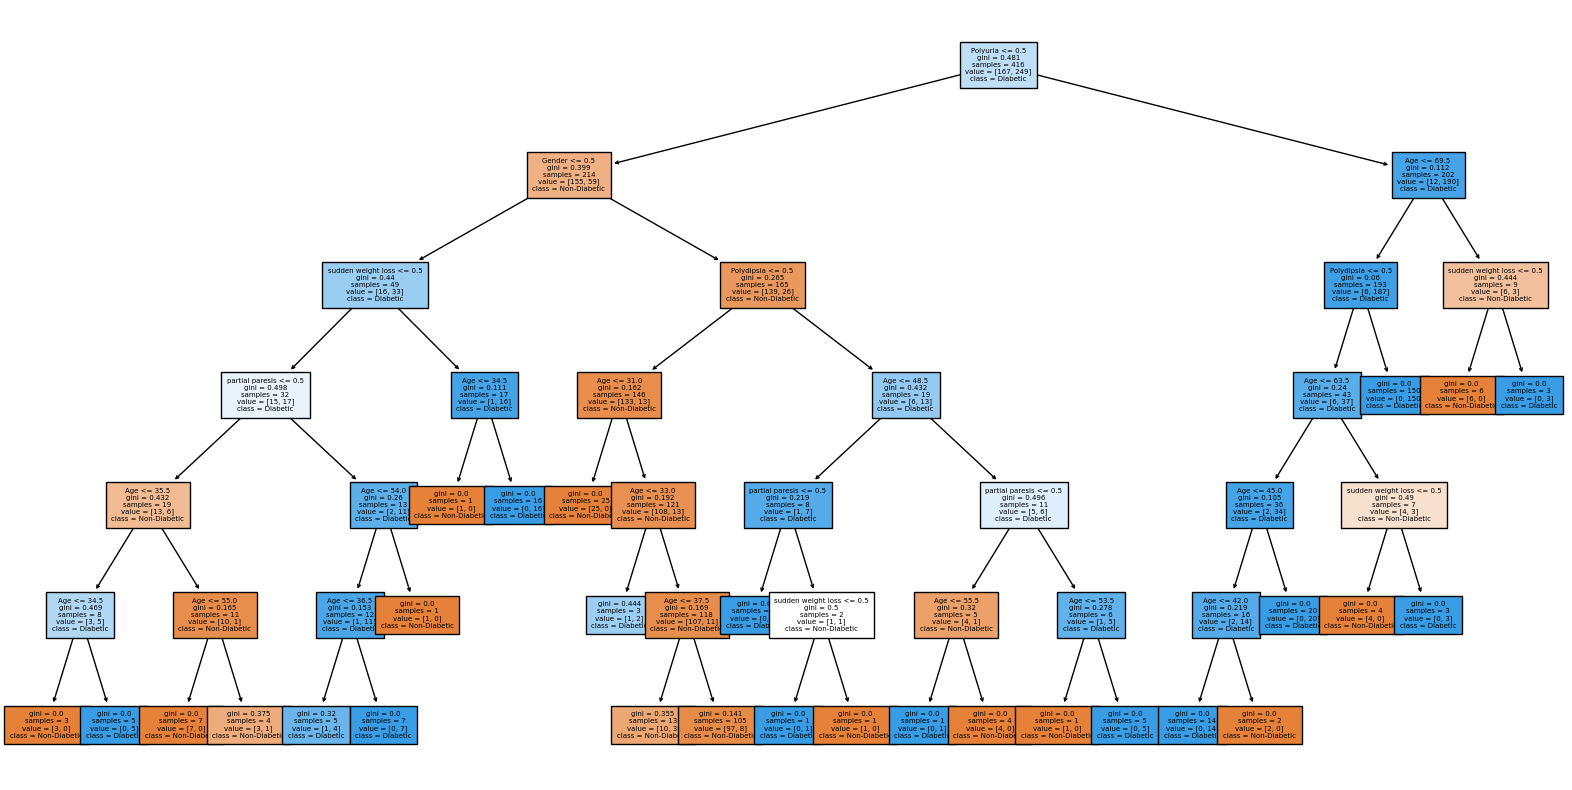

In [24]:
# plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree, 
          filled=True, 
          feature_names = X_train.columns, 
          class_names=["Non-Diabetic", "Diabetic"], 
          fontsize = 5)
plt.show()

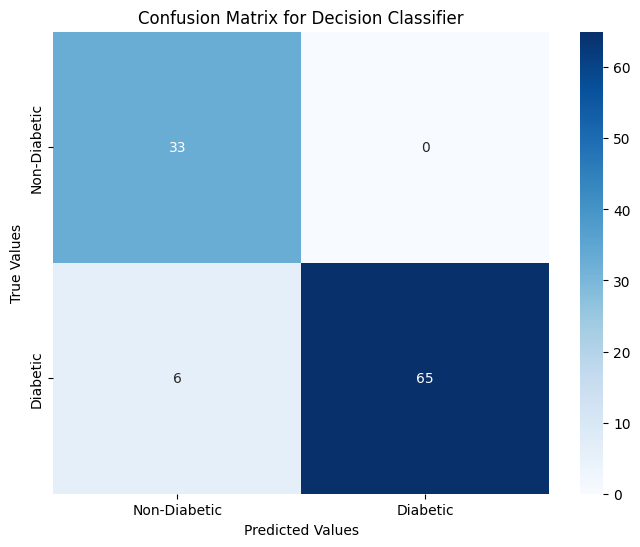

In [25]:
# evaluate the model's accuracy and precision
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# plot confusion matrix using sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, cmap = "Blues", 
            xticklabels=['Non-Diabetic', 'Diabetic'], 
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Confusion Matrix for Decision Classifier")
plt.show()

**Observations:** Looking at the decision tree above, it was able to identify what aspects of the classifications would predict whether one is likely to have diabetes or not. Also, in addition to adding to this model, the accuracy and precisions were high with an accuracy of **0.942** and **1.0**. Based on this, it is evident that those who are, female, have polyuria, have partial paresis and have sudden weight loss are most prone to being diabetic. As for age, those who were generally above 33 years of age were more likely you have diabetes. Lastly, from the evaluation of the confusion matrix, it demonstrates that both the True Positive values and True Negative values were found to be high, indicating the model is pretty accurate and precise in predicting diabetes based on those risk factors. However, with the precision of 1.0, it is ideal but it is also a sign it could potentially be overfitted.

### 5 Results and Analysis

---

#### 5.1 Evaluate Model Performance
Although it is good to have a model that is able to predict diabetes from a set of risk factors, it is also vital to evaluate whether the model is able to learn through larger training datasets. This is important because there is always the possiblity that a model is overfitted and unable to reach its fullest potentioal for learning. In result to ensure that the model is learning efficiently, it is best to plot a learning curve. 

A learning curve is used to evaluate whether the model is able to continue learning, despite the training data size changing. If the cross-validation scores are able to converge with the training score, this will indicate that the model learned enough to where performance is not impacted by the training data size.

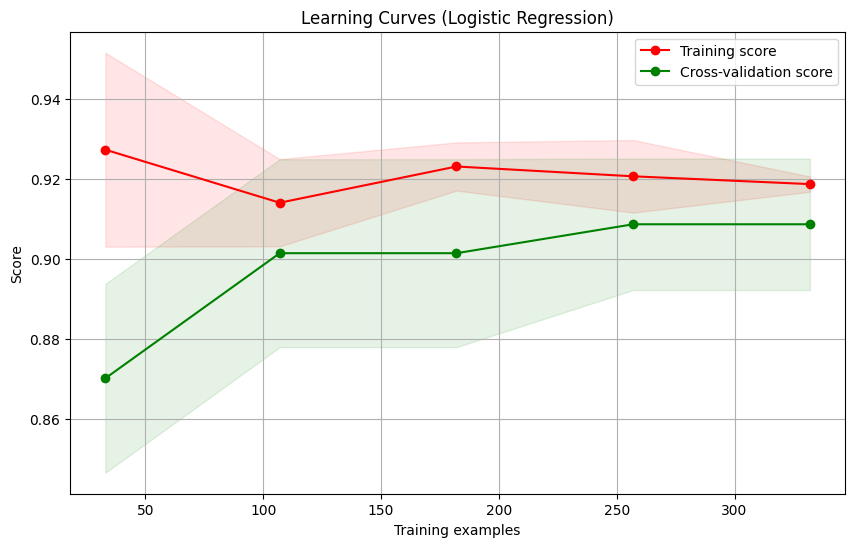

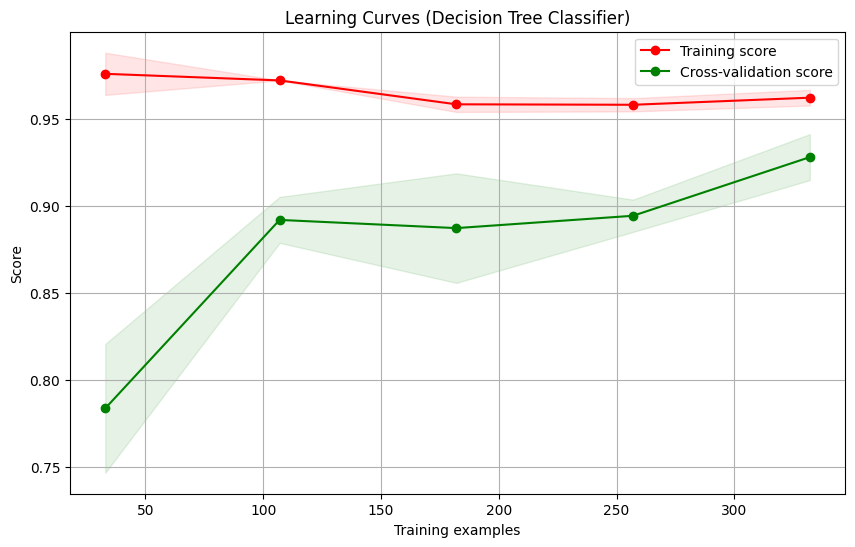

In [26]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes = np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    if ylim is not None:
        plt.ylim(*ylim)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    # get train score stats
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # find error boundaries for train and test
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot line for learning curve
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    # display labels, legend, and grid
    plt.legend()
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.title(title)
    plt.grid()
    return plt


# plot the learning curve for logistic regression
plot_learning_curve(log_reg, "Learning Curves (Logistic Regression)", 
                    X_train, y_train, cv = 5, n_jobs = -1)

# plot the learning curve for decision tree classifier
plot_learning_curve(decision_tree, "Learning Curves (Decision Tree Classifier)", 
                    X_train, y_train, cv = 5, n_jobs= -1)

plt.show()

**Observations:** For the Learning curve plots above, it is evident that the Logistic Regression was able to get cross validation scores to converge with the training dat set. Meanwhile, the Decision Tree Classifier's training score starts diverging from the cross-validation score after about 300 training examples. 

#### 5.2 Results
Given the accuracy scores, precision scores, and confusion matrices for both the Decision Tree Classifier, it is evident that both models were able to predict with accuracies and precisions greater than 90%. The accuracy scores and precision scores for Logistc Regression was found to be 0.933 and 0.933; respectively, while Decision Tree Classifier was found to be 0.942 and 0.949; respectively. Furthermore the Confusion Matrices demonstrated how both models were truly able to predict True Positives and True Negatives without many False Negatives and False Positives.

For the Decision Tree Classifiers, it was able to determine the traits that were more likely to be at risk for diabetes. The tree found that: individuals who were either over 37 years of age, female, have polyuria, or have polydipsia were at risk for diabetes. It also found that those who had sudden weight loss or partial paresis were likely to be diabetic as well.

However, for the learning curves, the plots demonstrate that training score and cross-validation score converges for the logistic regression, while the training score for Decision Tree Classifier begins to diverge after around 250 training examples.

#### 5.2 Analysis
Based on the accuracy and precision scores, it is evident that both models are great models to predict diabetes, given the selected risk factors. This is because the accuracy and precision of the predicted values were so close to the orginal expected values, which is how the values of both models came out to be above 90%. Therefore, both models performed great in predicting diabetes risk. Given the values found on both, it would be presumed that Decision Tree Classifier is the more accurate model for prediction

On the other hand, the learning curve demonstrated that Logistic Regression is the better model. In the learning curve plots, only Logistic Regression was able to converge, while Decision Tree Classifier diverged after 250 training examples. Given that convergence is vital in ensure there is no overfitting and that the machine was able to learn, it is evident in this respect that Logistic Regression is the better model. However, it is only good as long as the number of features are relatively low.

From this analysis, it is clear that both models perform well However, Decision Tree Classifier is slightly more overfitted, despite being more accurate and precise, while Logistic Regression overall is a better machine learning approach for predicting Diabetes Risk.

### 6 Closing 

---

#### 6.1 Things to Improve
Despite having a clear idea of what model is best to learn how to predict Diabetes based on potential risk factors, it is evident there more things to consider when undergoing machine learning for this type of data again. Given that Decision Tree Classifiers was assigned a max height of 6 nodes, limiting the parameter to that value might have potentially caused the model to be overfitted. In result, it might be a good idea to consider adjusting the parameters more. 

Furthermore, given that the data was limited to the most correlated factors to `class`, this might have excluded some of the other risk factors that could better fit the model. Although increasing hte amoung of risk factors might take away from the model performance, it is not clear whether it will or not without testing it in the future.

Lastly, it would be interesting to consider working with other data that might demonstrate similar features or might include more non-binary classifications. This would be interesting to improve on because it might allow for more clustering kind of modeling. 

#### 6.2 Conclusion
In conclusion, it is evident that through the usage of Logistic Regression and Decision Tree Classifiers that Diabetes can be predicted through the risk factors such as `Age`, `gender`, `Polyuria`, `Polydipsia`, `sudden weight loss`, and `partial paresis`. Furthermore, it was found through modeling that those who were had more risks of diabetes had partial paresis, sudden weight lost, polyuria and were females, which matched the trends detects in EDA. Those above 37 years of age had higher risks of diabetes. Although Decision Tree Classifiers helped identify what traits made at risk for diabetes, it was not the best model for learning to predict whether one will be at risk for Diabetes.

### 7 Source

---

**7.1 Citation**

Himanshu (rcratos).(n.d.). Diabetes Risk Prediction [Data set]. Kaggle. Retrieved from https://www.kaggle.com/datasets/rcratos/diabetes-risk-prediction

### 8 Github

---

**GitHub Link:** https://github.com/kpnguyenco/Supervised-Data-Analysis-Diabetes-Risk.git